# 茅台股价波动性分析

- 数据来源：`akshare` 包在线下载
- 时间范围：2018-01-01 至 2025-05-18

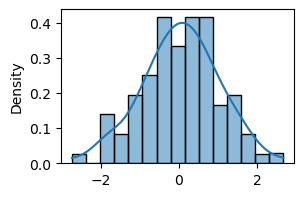

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 生成随机数
x = np.random.normal(0, 1, 100)
# 绘制直方图和密度函数图
plt.figure(figsize=(3, 2))
sns.histplot(x, bins=15, kde=True, stat="density")
plt.show()

## 新建一个项目

使用如下提示词生成项目文档结构：

::: {.callout-prompt}
- 主文件夹：D:\FinData\Proj_Maotai 
- 任务：
  - 采用循环语句自动创建 codes, data, doc, output 子文件夹；
  - 生成新变量 path_data, path_codes 对应子文件夹所在路径
:::

利用 ChatGPT 或 DeepSeek 可以生成如下代码：


In [3]:

# 设定工作路径
import os
path = r'D:\FinData\Proj_Maotai'  # 工作路径，酌情修改
if not os.path.exists(path):      # 如果路径不存在，则创建
    os.makedirs(path)

# 自动创建所需子文件夹
subfolders = ['codes', 'data', 'doc', 'output']
for folder in subfolders:
    full_path = os.path.join(path, folder)
    if not os.path.exists(full_path):
        os.makedirs(full_path)

# 生成新变量 path_data, path_codes
path_data = os.path.join(path, 'data')
path_codes = os.path.join(path, 'codes')
path_data = os.path.join(path, 'data')  # 数据存放路径

# 设置工作路径
os.chdir(path)                   


## 获取数据

下面我们来演示使用 `akshare` 包获取数据的过程。

如过你已经安装了 `github copilot` 或 `codeium` 等代码助手，则只需在新建的代码块中输入 `import
`，然后按 `tab` 键即可自动补全代码。一行补全后，代码助手会持续帮你写后续代码。

如果没有安装代码助手，可以写一个提示词贴到 ChatGPT, DeepSeek 等 AI 聊天工具中，自动生成代码。例如：

::: {.callout-prompt}
- 目的：获取贵州茅台的股价数据
- 数据范围：2018-01-01 至 2025-05-18
- 数据源：akshare
- 语言：python
- 变量：交易日期，收盘价，开盘价，最高价，最低价，成交量
- 分析任务：
  - 绘制股价走势图
  - 绘制收益率的密度函数图
:::


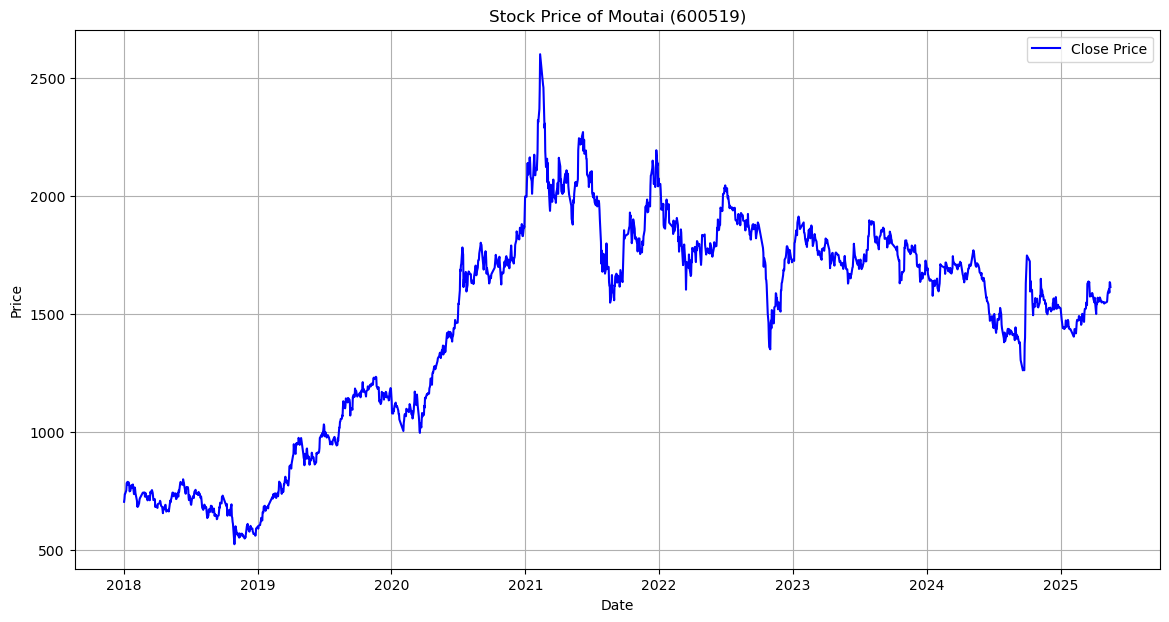

In [5]:
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 获取数据
start_date = '20180101'
end_date = '20250518'
df = ak.stock_zh_a_daily(symbol="sh600519", 
                         start_date=start_date, 
                         end_date=end_date)
df = df[['date', 'close']]
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
df['close'] = df['close'].astype(float)

# 计算收益率
df['return'] = df['close'].pct_change()

# 另存一份 .csv 格式的数据
df.to_csv(os.path.join(path, 'moutai_data.csv'), index=True)

# 绘图：股价时序图
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')
plt.title('Stock Price of Moutai (600519)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


## 收益率的统计特征